## Morphological Operators

- these are sets of kernels that can achieve a variety of effects , such as reducing noise
- Certain operators are very good at reducing black point on a white background (and vice versa)
- Certain operators can also achieve an erosion and dilation effect that can add or erode form an existing image

In [45]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def load_img():
    blank_img =np.zeros((600,600))
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv.LINE_AA)
    return blank_img

def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

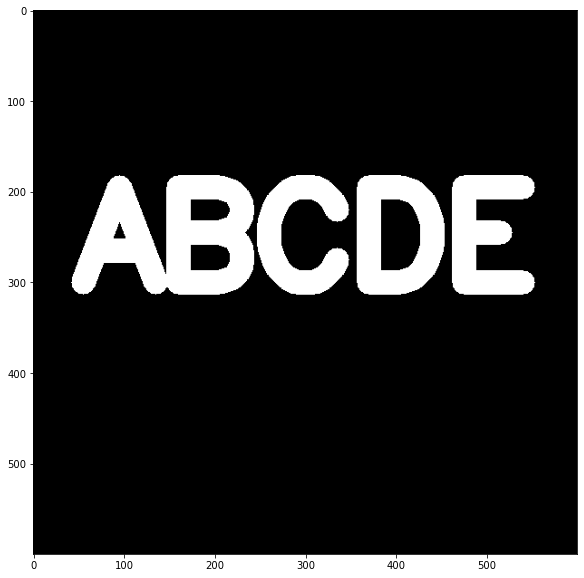

In [46]:
img = load_img()
display_img(img)

## Erosion

In [47]:
kernel = np.ones((5,5), dtype = np.uint8) 
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

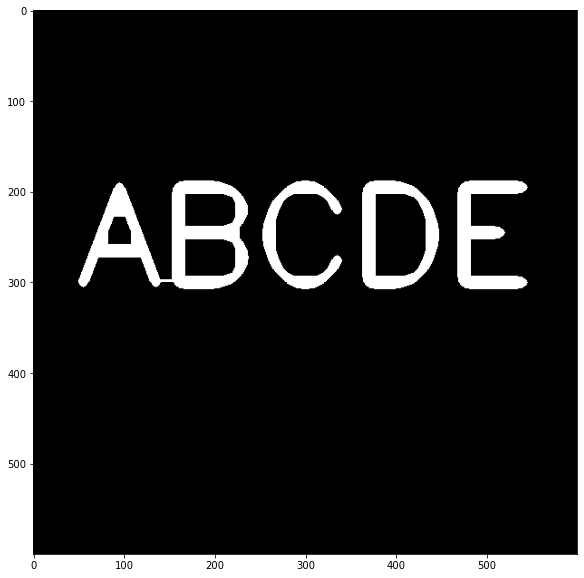

In [48]:
erosion_result = cv.erode(img, kernel, iterations= 3)  # more iterations = more erosion
display_img(erosion_result)


## Dilation 
it is opposite of erosion

In [49]:
img = load_img()

In [50]:
white_noise = np.random.randint(low = 0, high=2, size = (600,600))
white_noise

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1]])

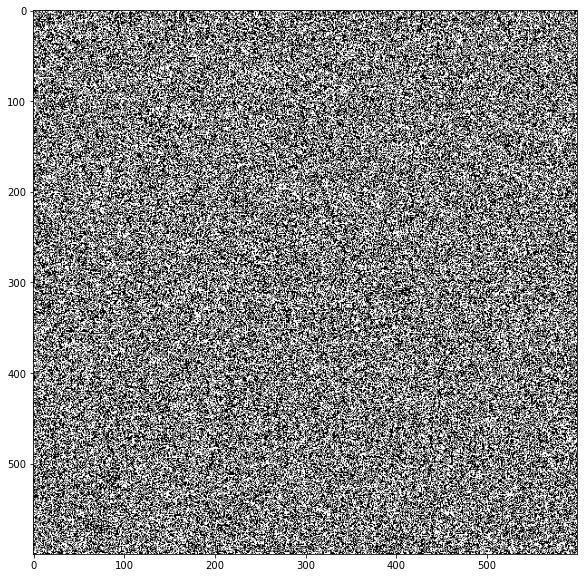

In [51]:
display_img(white_noise)

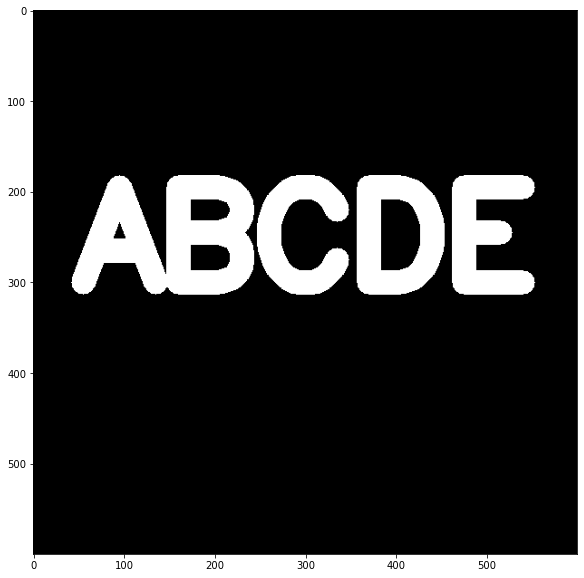

In [52]:
# adding noise to original image
display_img(img)

In [53]:
img.max()

255.0

In [54]:
white_noise = white_noise * 255 # 0 and 255 , so same scale as original image

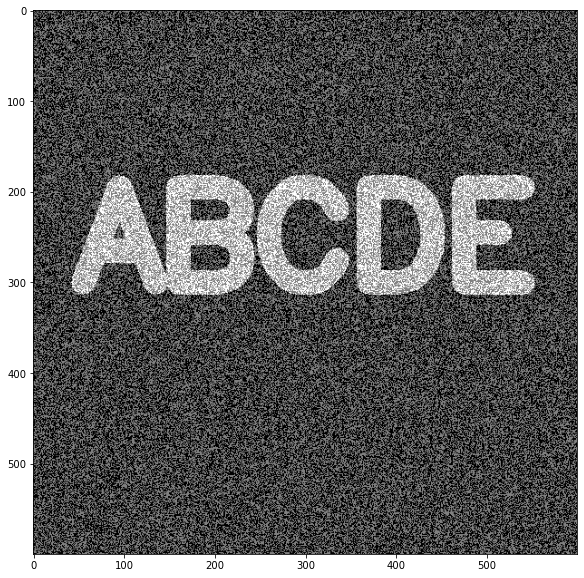

In [55]:
noise_img = white_noise + img
display_img(noise_img)

## Opening 
reducing black and white noise

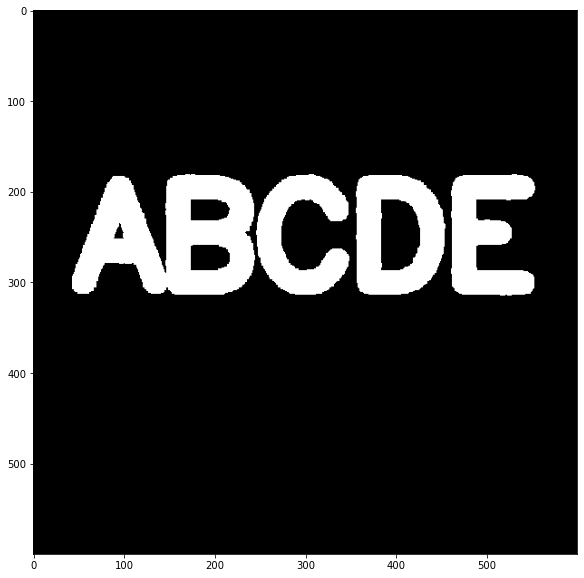

In [56]:
opening = cv.morphologyEx(noise_img, cv.MORPH_OPEN, kernel)
display_img(opening)

## Closing to clear foreground noise

In [57]:
img = load_img()

In [58]:
black_noise = np.random.randint(low = 0, high = 2, size = (600,600))
black_noise

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0]])

In [59]:
black_noise = black_noise * -255
black_noise

array([[-255, -255,    0, ..., -255,    0, -255],
       [-255, -255, -255, ...,    0, -255,    0],
       [-255,    0,    0, ..., -255,    0,    0],
       ...,
       [-255,    0, -255, ..., -255, -255,    0],
       [   0, -255, -255, ...,    0,    0, -255],
       [   0, -255,    0, ...,    0, -255,    0]])

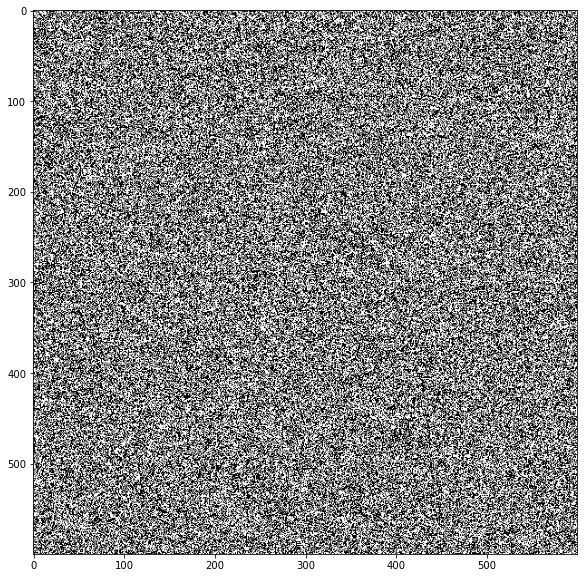

In [60]:
display_img(black_noise)

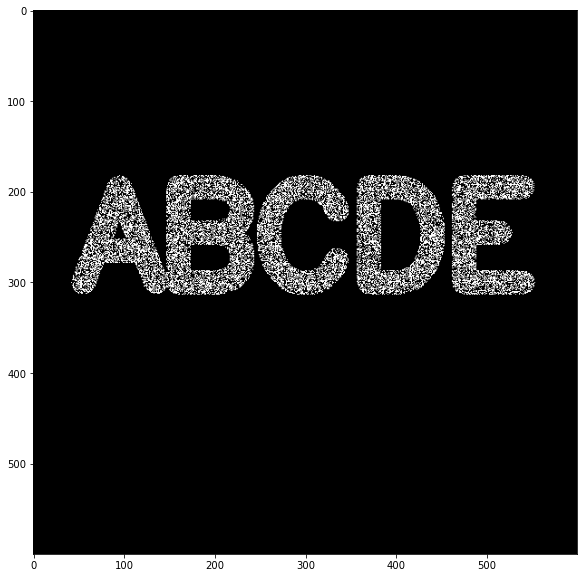

In [61]:
black_noise = img + black_noise
black_noise[black_noise==-255] = 0
display_img(black_noise)

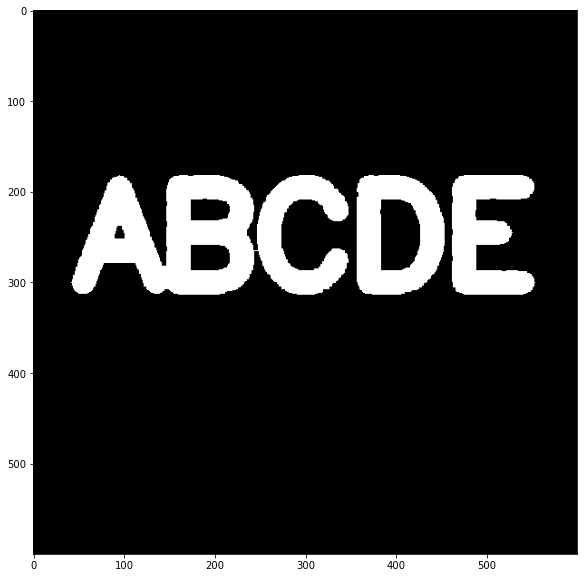

In [63]:
closing = cv.morphologyEx(black_noise , cv.MORPH_CLOSE,kernel)
display_img(closing)

# Edge Detection using Gradient  
Difference between erosion and dilation , GRADIENT

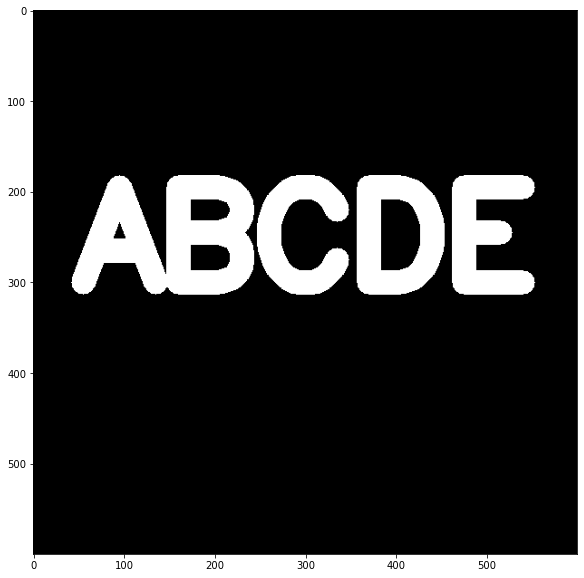

In [64]:
img = load_img()
display_img(img)

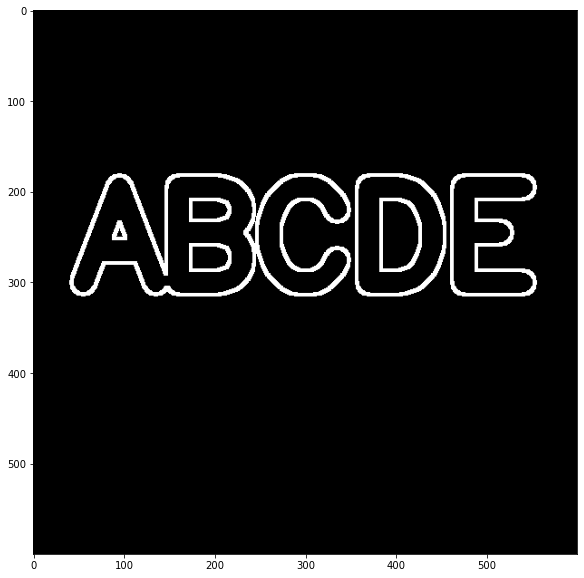

In [65]:
# Crude form of edge detection
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
display_img(gradient)